In [1]:
# import libraries
import nltk
import re
import pandas as pd

In [29]:
# import data

fullCorpus = pd.read_csv("C:\\Users\\odellj\\OneDrive - Northwood University\\Documents\\MSBA\\MGT 661 AI & Bus Analytc\\Week 5\\Import Market Basket.csv")

In [31]:
# Define the function to tokenize a string
def tokenize(text): 
    """
    Tokenizes the input text into words based on whitespace.
    If the input is not a string, it returns an empty list.

    Args:
        text (str): The text to tokenize.

    Returns:
        list: A list of tokenized words.
    """
    if not isinstance(text, str):  # Check if the input is not a string
        return []
    tokens = re.split(r'\s+', text)  # Tokenize based on whitespace
    return tokens

# Apply the 'tokenize' function to the column
fullCorpus['Desc_adjusted'] = fullCorpus['Desc'].apply(tokenize)

# Print the result
print(fullCorpus.head())

              Item                                               Desc  Qty  \
0  14 MISC          FRONTS 20% REMAIN             F SUPER PREM SM ...    1   
1  14 MISC          NEEDED WITH PAD CHANGE        F PAD SENSOR WIR...    1   
2  14 MISC          LR CALIPER, LOCKED UP GRINDINGR LT REB CALP W/...    1   
3  14 MISC          REARS, LR GRINDING            R DISC BRAKE ROT...    2   
4  14 MISC          REARS, GRINDING               R SUPER PREM SM ...    1   

   Store  Brake                                      Desc_adjusted  
0      2      1  [FRONTS, 20%, REMAIN, F, SUPER, PREM, SM, PAD,...  
1      2      1  [NEEDED, WITH, PAD, CHANGE, F, PAD, SENSOR, WI...  
2      2      1  [LR, CALIPER,, LOCKED, UP, GRINDINGR, LT, REB,...  
3      2      1  [REARS,, LR, GRINDING, R, DISC, BRAKE, ROTOR, ...  
4      2      1  [REARS,, GRINDING, R, SUPER, PREM, SM, PAD, CE...  


In [32]:
# remove stopwords

stopword = nltk.corpus.stopwords.words('english') # import the NLTK Stopword list

# define a function to remove stopwords

def noStop(text): # text: the text in a cell to from which to remove stopwords
    text_nostop = [word for word in text if word not in stopword]
    return text_nostop # text_nostop: an array of words not found in the stopwords list

# call the 'noStop' function for the first cell in a column and iterate through all cells in the column

fullCorpus['Desc_adjusted'] = fullCorpus['Desc_adjusted'].apply(noStop)

print(fullCorpus.head())

              Item                                               Desc  Qty  \
0  14 MISC          FRONTS 20% REMAIN             F SUPER PREM SM ...    1   
1  14 MISC          NEEDED WITH PAD CHANGE        F PAD SENSOR WIR...    1   
2  14 MISC          LR CALIPER, LOCKED UP GRINDINGR LT REB CALP W/...    1   
3  14 MISC          REARS, LR GRINDING            R DISC BRAKE ROT...    2   
4  14 MISC          REARS, GRINDING               R SUPER PREM SM ...    1   

   Store  Brake                                      Desc_adjusted  
0      2      1  [FRONTS, 20%, REMAIN, F, SUPER, PREM, SM, PAD,...  
1      2      1  [NEEDED, WITH, PAD, CHANGE, F, PAD, SENSOR, WI...  
2      2      1  [LR, CALIPER,, LOCKED, UP, GRINDINGR, LT, REB,...  
3      2      1  [REARS,, LR, GRINDING, R, DISC, BRAKE, ROTOR, ...  
4      2      1  [REARS,, GRINDING, R, SUPER, PREM, SM, PAD, CE...  


In [33]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

fullCorpus['Desc_adjusted'] = fullCorpus['Desc_adjusted'].apply(lemmatizing)

print(fullCorpus.head())

              Item                                               Desc  Qty  \
0  14 MISC          FRONTS 20% REMAIN             F SUPER PREM SM ...    1   
1  14 MISC          NEEDED WITH PAD CHANGE        F PAD SENSOR WIR...    1   
2  14 MISC          LR CALIPER, LOCKED UP GRINDINGR LT REB CALP W/...    1   
3  14 MISC          REARS, LR GRINDING            R DISC BRAKE ROT...    2   
4  14 MISC          REARS, GRINDING               R SUPER PREM SM ...    1   

   Store  Brake                                      Desc_adjusted  
0      2      1  [FRONTS, 20%, REMAIN, F, SUPER, PREM, SM, PAD,...  
1      2      1  [NEEDED, WITH, PAD, CHANGE, F, PAD, SENSOR, WI...  
2      2      1  [LR, CALIPER,, LOCKED, UP, GRINDINGR, LT, REB,...  
3      2      1  [REARS,, LR, GRINDING, R, DISC, BRAKE, ROTOR, ...  
4      2      1  [REARS,, GRINDING, R, SUPER, PREM, SM, PAD, CE...  


In [34]:
# define brand list to look for in tokenized list. In later versions replace this list with the Auto Care Brand Table

brand_list = ["VALEO", "WALKER", "BOSAL", "ANCHOR", "INTERMOTOR", "AUTOLIGHT", "AUTOLITE", "CHAMPION", "WAI", "ECOGARD", "WIX", "MANN-FILTER", "NGK", "DIVERSIFIED", "SURTRACK", "MRO", "MONROE", "SACHS", "MOOG", "KYB", "DELPHI", "MAS", "AUTOZONE", "AUTO ZONE", "NAPA", "O'REILLY", "OREILLy", "CAR QUEST", "CQ", "CARQUEST", "ADVANCE", "ADVANCE AUTO", "BBB", "EXIDE", "INTERSTATE", "MOTORCRAFT", "AC Delco", "MAHLE", "CRP", "PENTOSIN", "CONTITECH", "FOUR SEASONS", "BECK/ARNLEY", "BECK ARNLEY", "TYC", "DENSO", "GATES", "MOTORAD", "AISIN", "AKEBONO", "BANDO", "BOSCH", "CARLSON", "CENTRIC", "DORMAN", "DURAGO", "SKF", "STANDARD", "STANDARD MOTOR", "GMB", "SPECTRA PREMIUM", "SPECTRA PREMIU" "TIMKEN", "WAGNER"]

# define a function to look through an array to find brand names 

def filter_brand(words, custom_list):
    """
    Loops through an array of words and checks if each word is in a custom-defined list.
    If the word is found, it is added to a new array.
    If the word is not found, "Not Found" is added to the new array.

    Args:
        words (list): The list of words to check.
        custom_list (list): The custom-defined list to check against.

    Returns:
        list: A new array with either the word (if found) or "Not Found" (if not found).
    """
    for word in words:
        if word.upper() in custom_list:
            return word
    return "Not Found"


# A# call the 'filter_brand' function for the first cell in a column and iterate through all cells in the column

fullCorpus['brand'] = fullCorpus['Desc_adjusted'].apply(lambda x: filter_brand(x, brand_list))

print(fullCorpus.head(20))

               Item                                               Desc  Qty  \
0   14 MISC          FRONTS 20% REMAIN             F SUPER PREM SM ...    1   
1   14 MISC          NEEDED WITH PAD CHANGE        F PAD SENSOR WIR...    1   
2   14 MISC          LR CALIPER, LOCKED UP GRINDINGR LT REB CALP W/...    1   
3   14 MISC          REARS, LR GRINDING            R DISC BRAKE ROT...    2   
4   14 MISC          REARS, GRINDING               R SUPER PREM SM ...    1   
5   14 MISC          REAR WIRE, WITH PADS          R PAD SENSOR WIR...    1   
6   14 MISC          LR PADS GRINDING              R SUPER PREM CER...    1   
7   14 MISC          REAR ROTORS DAMAGED           R PREMIUM ROTOR ...    2   
8   14 MISC          REAR PAD SENSOR WIRE          R PAD SENSOR WIR...    1   
9   14 MISC          R/F CALIPER HANGING UP        F RT REB CALP W/...    1   
10  14 MISC          NEEDED                        F PAD SENSOR WIR...    2   
11  14 MISC          FRONT ROTOR DISCARD AT 1.339  F

In [41]:
print("Out of {} rows, {} are Not Found".format(len(fullCorpus),
                                        len(fullCorpus[fullCorpus['brand']=="Not Found"])))

Out of 7139 rows, 1169 are Not Found


In [46]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

AttributeError: module 'matplotlib' has no attribute 'xlabel'

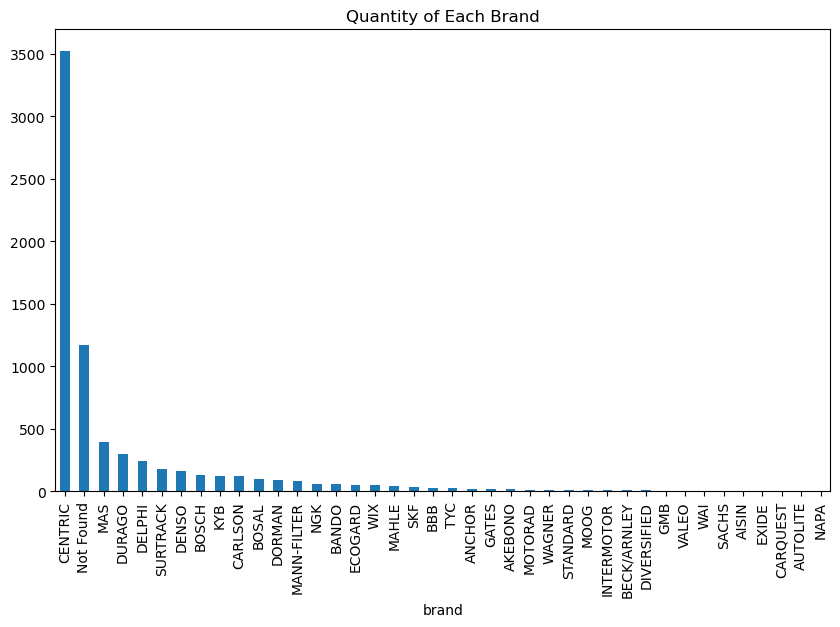

In [48]:
# Display a histogram of the quantity of each brand in the 'Brand' column
brand_counts = fullCorpus['brand'].value_counts()
brand_counts.plot(kind='bar', figsize=(10, 6), title='Quantity of Each Brand')
plt.xlabel('brand')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
print("Out of {} rows, {} are CENTRIC".format(len(fullCorpus),
                                        len(fullCorpus[fullCorpus['brand']=="CENTRIC"])))

Out of 7139 rows, 3520 are CENTRIC
